# Importing Libraries

In [1]:
import re
import string
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, confusion_matrix
from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd

# Reading dataset

In [2]:
data = pd.read_csv(r'fake_job_postings.csv')

In [4]:
data.shape

(17880, 18)

In [3]:
data.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [4]:
data.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


## Dataset Coorelaion 

<AxesSubplot:>

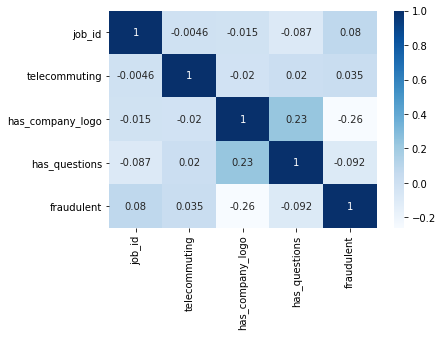

In [8]:
import seaborn as sb
corr = data.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

## We will check the shape of the dataset and the top five elements of the dataset.
## shape of the dataset

In [86]:
data.shape

(17880, 18)

## show head of dataset

In [87]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## In the head of the dataset, we can see that missing values are present as NaN.
## We will check all the missing values in the replace them with blank.

In [3]:
data.interpolate(inplace=True)
data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [4]:
columns=['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'salary_range', 'employment_type']
for col in columns:
    del data[col]

## Fill NaN values with blank space

In [5]:
data.fillna(' ', inplace=True)

In [91]:
data.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## The data set is now free from the missing values. Now, we will check the total number of fraudulent postings and real postings.

## Fraud and Real visualization

,fraudulent,title
0,0,17014
1,1,866


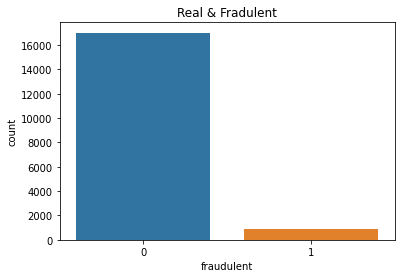

In [93]:
sns.countplot(data.fraudulent).set_title('Real & Fradulent')
data.groupby('fraudulent').count()['title'].reset_index().sort_values(by='title',ascending=False)

## In the next step, we will visualize the number of job postings by countries and by experience. 

## Visualize job postings by countries

In [6]:
def split(location):
    l = location.split(',')
    return l[0]

In [7]:
data['country'] = data.location.apply(split)

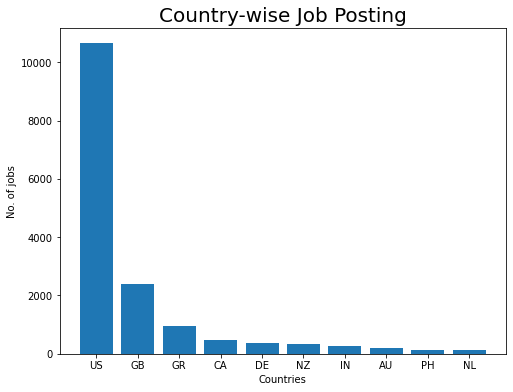

In [8]:
country = dict(data.country.value_counts()[:11])
del country[' ']
plt.figure(figsize=(8,6))
plt.title('Country-wise Job Posting', size=20)
plt.bar(country.keys(), country.values())
plt.ylabel('No. of jobs', size=10)
plt.xlabel('Countries', size=10)
plt.show()

## Visualize the required experiences in the jobs

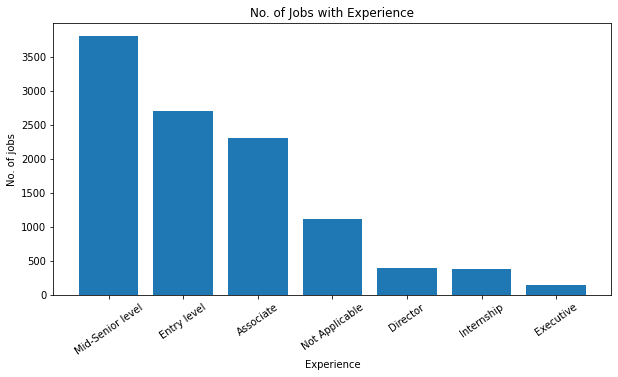

In [9]:
experience = dict(data.required_experience.value_counts())
del experience[' ']
plt.figure(figsize=(10,5))
plt.bar(experience.keys(), experience.values())
plt.title('No. of Jobs with Experience')
plt.xlabel('Experience', size=10)
plt.ylabel('No. of jobs', size=10)
plt.xticks(rotation=35)
plt.show()

## Here, we will check the count of titles in all job postings, in fraudulent job postings and in real job postings.

In [100]:
# Most frequent jobs
print(data.title.value_counts()[:10])

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        75
Web Developer                                          66
Project Manager                                        62
Name: title, dtype: int64


In [101]:
#Titles and count of fraudulent jobs
print(data[data.fraudulent==1].title.value_counts()[:10])

Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Data Entry Admin/Clerical Positions - Work From Home                    21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Payroll Clerk                                                           10
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Name: title, dtype: int64


In [102]:
#Titles and count of real jobs
print(data[data.fraudulent==0].title.value_counts()[:10])

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Name: title, dtype: int64


## In the next step, the dataset will be preprocessed for training. For this purpose, all the important text data is combined in one column and rest are deleted except the target column.

## Combine text in a single column to start cleaning our data

In [10]:
data['text']=data['title']+' '+data['location']+' '+data['company_profile']+' '+data['description']+' '+data['requirements']+' '+data['benefits']
del data['title']
del data['location']
del data['department']
del data['company_profile']
del data['description']
del data['requirements']
del data['benefits']
del data['required_experience']
del data['required_education']
del data['industry']
del data['function']
del data['country']

In [104]:
data.head()

,fraudulent,text
0,0,"Marketing Intern US, NY, New York We're Food52..."
1,0,"Customer Service - Cloud Video Production NZ, ..."
2,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,"Bill Review Manager US, FL, Fort Worth SpotSou..."


## To visualize the fraud and real job postings, the WordCloud is used to see the top occurring keywords in the data.
## To do so, fraud and real job postings are separated into two text files and WordCloud has plotted accordingly.

## Separate fraud and actual jobs

In [105]:
fraudjobs_text = data[data.fraudulent==1].text
actualjobs_text = data[data.fraudulent==0].text

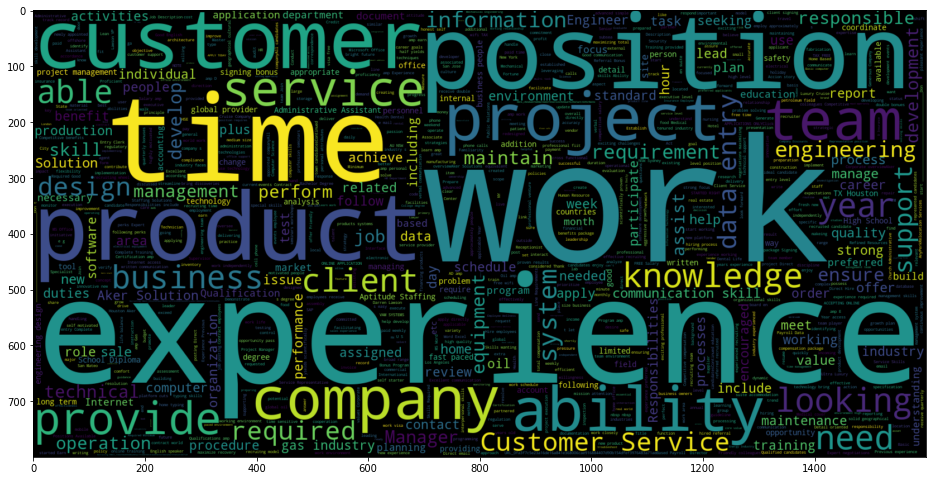

In [106]:
# Fraudulent jobs word cloud
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(fraudjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')
plt.show()

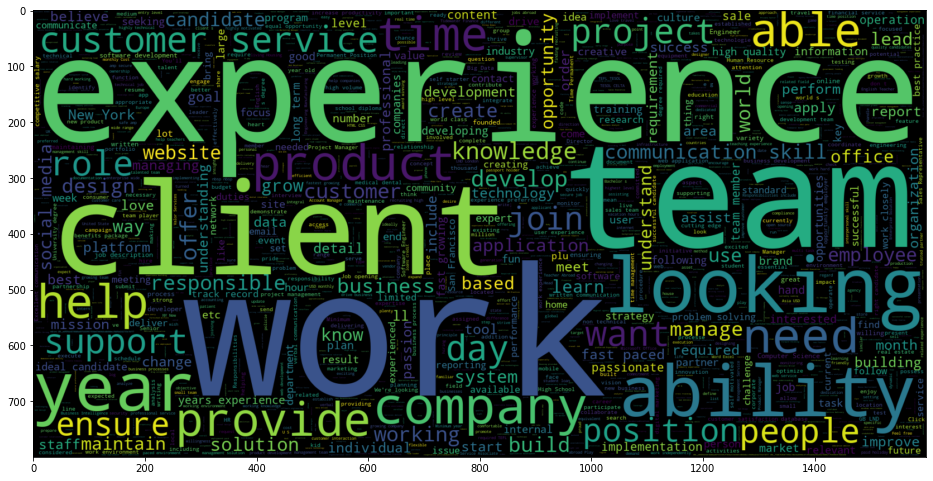

In [107]:
# Actual jobs wordcloud
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(actualjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')

## The dataset is cleaned and preprocessed using the below lines of codes.
## leaning and preprocessing
## Create our list of punctuation marks

In [11]:
punctuations = string.punctuation

## Create our list of stopwords

In [12]:
stop_words = spacy.lang.en.stop_words.STOP_WORDS

## Load English tokenizer, tagger, parser, NER and word vectors

In [13]:
parser = English()

## Creating our tokenizer function

In [14]:
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return a preprocessed list of tokens
    return mytokens

## Custom transformer using spaCy

In [15]:
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self
    def get_params(self, deep=True):
        return {}

## Basic function to clean the text

In [16]:
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

## Splitting dataset in train and test

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data.text, data.fraudulent, test_size=0.3)

In [18]:
# Train-test shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12516,)
(12516,)
(5364,)
(5364,)


## Once we are ready with the training and test data, we will train the machine learning model to classify the fraudulent and real job postings. In this task, we will use the Support Vector Classifier. The Pipeline is used to bind the cleaning, vectorization and classification works together.

## Support Vector Machine Classifier
## Create pipeline using Bag of Words

In [19]:
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,3))),
                 ('classifier', SVC(C=2, kernel='poly'))])

# Training the model.

In [20]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x0000026A38AF5308>),
                ('vectorizer',
                 CountVectorizer(ngram_range=(1, 3),
                                 tokenizer=<function spacy_tokenizer at 0x0000026A3863D1F8>)),
                ('classifier', SVC(C=2, kernel='poly'))])

## Fake Job Classification
## After successful training of the classifier, we will make predictions through it on the test data and obtain the accuracies by evaluation metrics.

# Predicting with a test dataset

In [21]:
y_pred = pipe.predict(X_test)

# Model Accuracy

Classification Accuracy: 0.9656972408650261
Classification Report

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5094
           1       0.99      0.32      0.49       270

    accuracy                           0.97      5364
   macro avg       0.98      0.66      0.73      5364
weighted avg       0.97      0.97      0.96      5364

Confusion Matrix

[[5093    1]
 [ 183   87]]


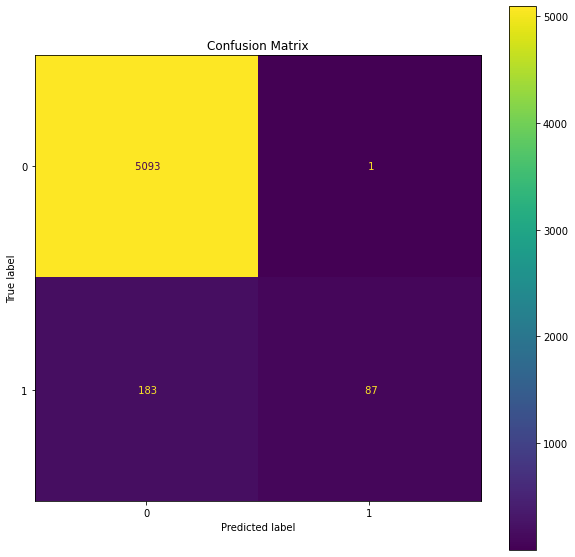

In [22]:
print("Classification Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report\n")
print(classification_report(y_test, y_pred))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred))
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(pipe, X_test, y_test, values_format=' ', ax=ax) 
plt.title('Confusion Matrix')
plt.show()

## Save Trained Model Using joblib

In [23]:
import joblib
joblib.dump(pipe, 'fyp_model_predict')

['fyp_model_predict']

In [24]:
mj = joblib.load('fyp_model_predict')

In [124]:
pred = mj.predict(X_test)
print("Classification Accuracy:", accuracy_score(y_test, pred))

Classification Accuracy: 0.964951528709918


In [25]:

p = mj.predict(["PACU RN   US, NV,    Find more jobs at #URL_1efb08d6a6da1c56afb2d0c686e1ed0dc14d0fbcb22482369e8a69999aa0d278#Apply to this job using below link#URL_1efb08d6a6da1c56afb2d0c686e1ed0dc14d0fbcb22482369e8a69999aa0d278#/jobs-united-states/917714/watkins-staffing/pacu-rnPACU RN (per diem) -- Las Vegas, NVRequirements: 2 - year minimum acute experience in a hospital setting. We're eager to fill positions immediately, please apply ASAP. Active Nevada State RN license.12 hour day shifts available, 12 - 48 hours per week***Guaranteed HoursAdvantages of Per Diem Nursing:• Make extra money, depending on their commitment, which is the main advantage. • Pick your own schedules based on your commitment.• 24 hours a week, 36 hours a week - one weekend a month and one holiday a year - these are the nurses making the big bucks, while providing sorely needed coverage.• In most cases staff nurses must work every other weekend, two holidays and can't necessarily pick their schedules.• Nothing can match the flexibility that comes with per diem shifts. Higher PayPer Diem shifts are paid at a higher rate. The flexibility to pick up shifts as needed, combined with higher wages allows you to maximize your earning potential.Bachelor's Degree or Associates Degree in Nursing is requiredMust possess U.S. hospital experience; recent specialty experience within 1 year.Active American Heart Association BLS, ACLS cardWeekly pay rates will be determine based on experience. ***Please Note: If you are proactively looking for an opportunity, or would like to view our MANY openings, you may follow the link and instructions below to create your profile"])


In [26]:
if p[0]==1:
    predicition='FAKE'
else:
    predicition='REAL'

In [27]:
predicition

'FAKE'

In [29]:
mj.named_steps

{'cleaner': <__main__.predictors at 0x26a278a02c8>,
 'vectorizer': CountVectorizer(ngram_range=(1, 3),
                 tokenizer=<function spacy_tokenizer at 0x0000026A3863D1F8>),
 'classifier': SVC(C=2, kernel='poly')}

# End here